# Taller #4 Seleccion de caracteristicas
### Presentado por: Leonardo Sánchez
### Presentado a: Felipe Palta
### Universidad Autónoma de Occidente
### Especialización en Inteligencia Artificial

### Seleccion de caracteristicas iris data set 
1. Cargar librerías usadas en Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Carga y revisión del conjunto der datos 

In [2]:
path = './Iris.csv'   
df_iris = pd.read_csv(path)
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dimensión del data set

In [3]:
df_iris.shape

(150, 6)

Información basica del data set

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Estadisticas basicas

In [5]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Nulos

In [6]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Conteo y Porporción de clases 

In [7]:
print('Clases')
display(df_iris["Species"].unique())
print('Conteo de clases')
display(df_iris["Species"].value_counts().to_frame())
print('Proporción de clases')
df_iris["Species"].value_counts(normalize=True).to_frame()

Clases


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Conteo de clases


,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Proporción de clases


,Species
Iris-setosa,0.333333
Iris-versicolor,0.333333
Iris-virginica,0.333333


In [8]:
df_iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Graficando el data set

**Caracteristicas**

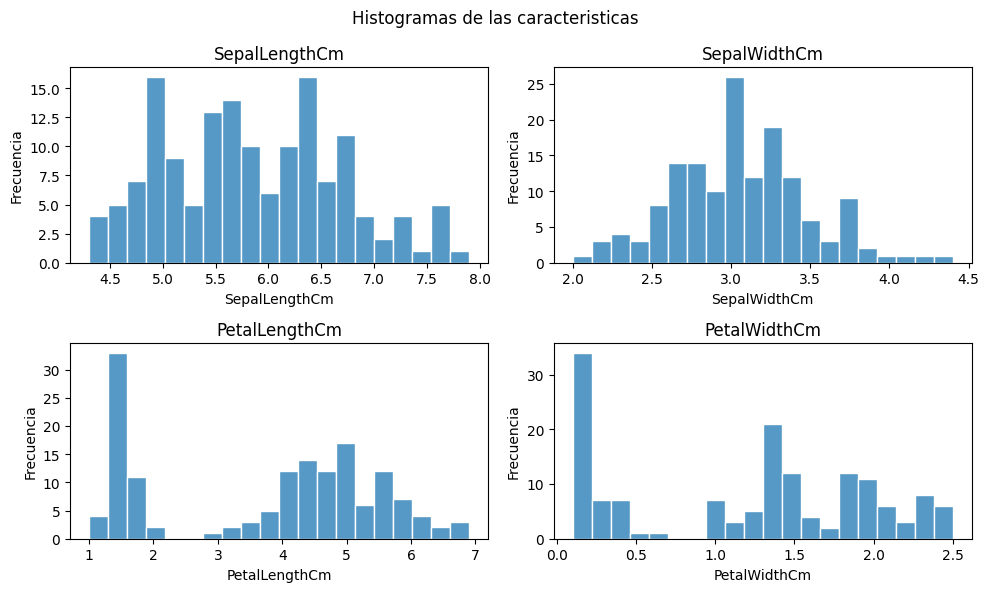

In [9]:
features = df_iris.columns[1:-1]
fig, ax = plt.subplots(2,2,figsize=(10, 6))
ax = ax.ravel()
fig.suptitle('Histogramas de las caracteristicas')
for indice, feature in enumerate(features):
    sns.histplot(data=df_iris, x=feature,ax=ax[indice],bins=20,edgecolor='white')
    plt.title(f'Frecuencia de {feature}')
    ax[indice].set_xlabel(feature)
    ax[indice].set_ylabel('Frecuencia')
    ax[indice].set_title(f'{feature}')
plt.tight_layout()  
plt.show()

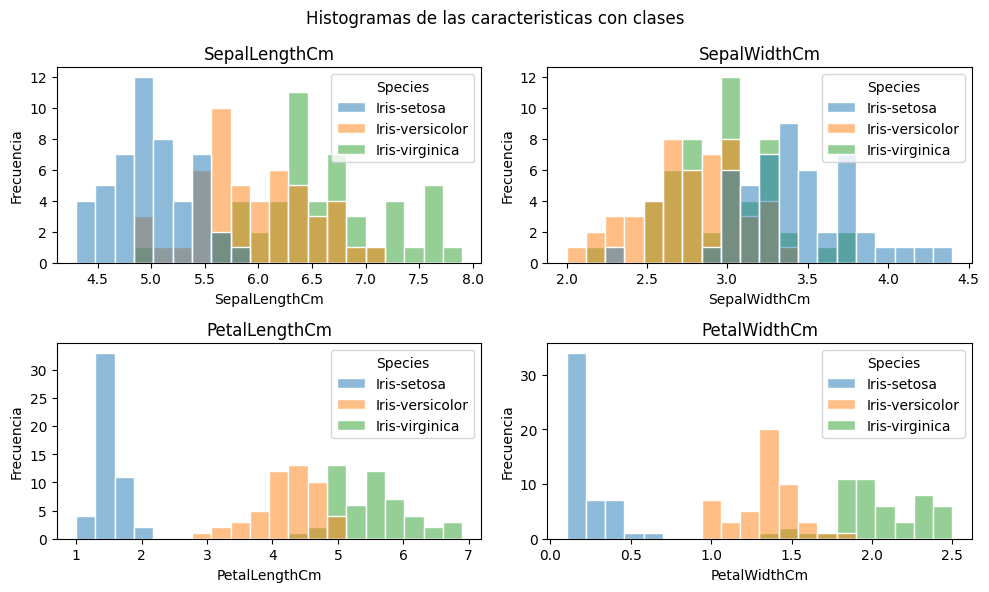

In [10]:
features = df_iris.columns[1:-1]
fig, ax = plt.subplots(2,2,figsize=(10, 6))
ax = ax.ravel()
fig.suptitle('Histogramas de las caracteristicas con clases')
for indice, feature in enumerate(features):
    sns.histplot(data=df_iris, x=feature,ax=ax[indice],bins=20,edgecolor='white',hue='Species')
    plt.title(f'Frecuencia de {feature}')
    ax[indice].set_xlabel(feature)
    ax[indice].set_ylabel('Frecuencia')
    ax[indice].set_title(f'{feature}')
    legend = ax[indice].get_legend()
    
plt.tight_layout()  
plt.show()

La **etiqueta**

Text(0.5, 1.0, 'Conteo de Especies')

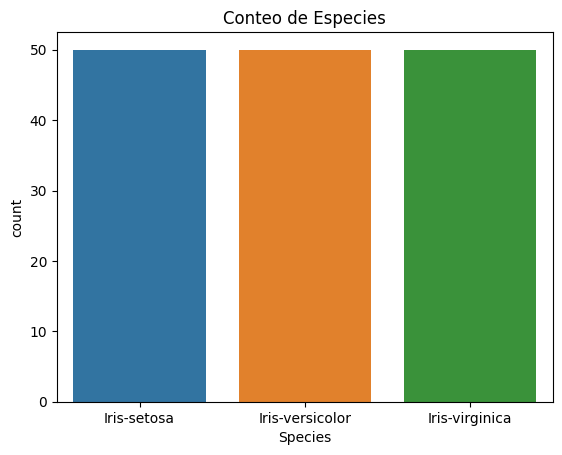

In [11]:
sns.countplot(data=df_iris, x='Species')
plt.title('Conteo de Especies')

Calculo de la correlación 

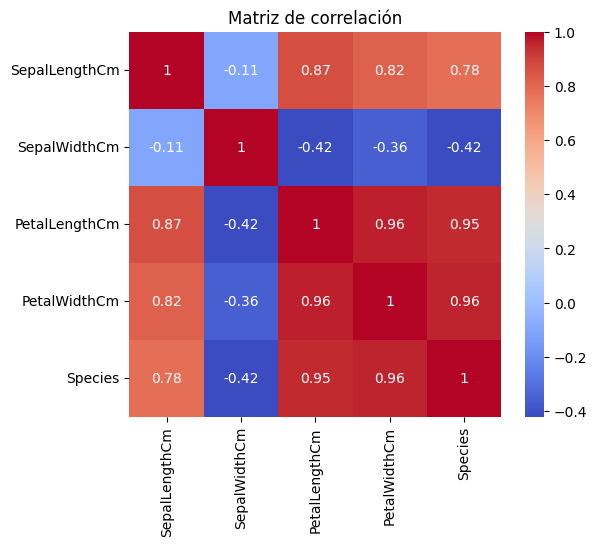

In [77]:
correlacion = df_iris.drop(columns=['Id']).corr()
top_corr_features = correlacion.index
plt.figure(figsize=(6,5))
sns.heatmap(df_iris[top_corr_features].corr(),annot=True,cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### **Etapa 2 Selección de características (Machine Learning)**:

***Feature Selection***

### Information Gain

Para esto debemos etiquetar con numeros la variable objetivo.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar las especies de Iris en números
df_iris['Species'] = label_encoder.fit_transform(df_iris['Species'])

# Mostrar el DataFrame con las especies codificadas
display(df_iris.head())
print("Especies codificadas",df_iris['Species'].unique() )


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Especies codificadas [0 1 2]


Ahora calculamos la información mutua

In [14]:
# Importa la función de selección de características
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [15]:
# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df_iris.drop(columns=['Species','Id'])
y = df_iris['Species']
print(f'matriz de caracteristicas')
display(X)

matriz de caracteristicas


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
print('variable objetivo\n')
print(y)

variable objetivo

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


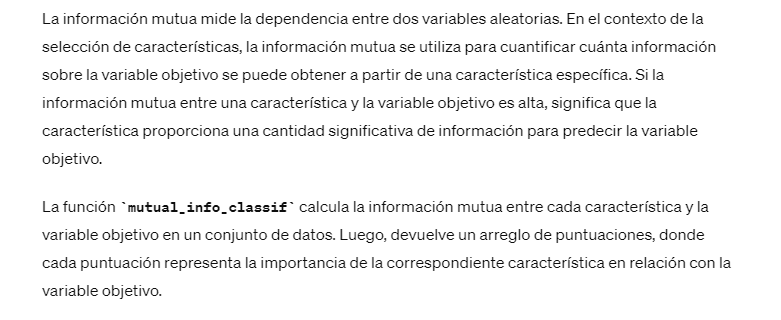
Se debe tener en cuenta que es un numero que varia entre [0.1]

Ahora calculemos la informacion mutua.



,Feature,Mutual_Info_Score
2,PetalLengthCm,0.992573
3,PetalWidthCm,0.985643
0,SepalLengthCm,0.511365
1,SepalWidthCm,0.289759


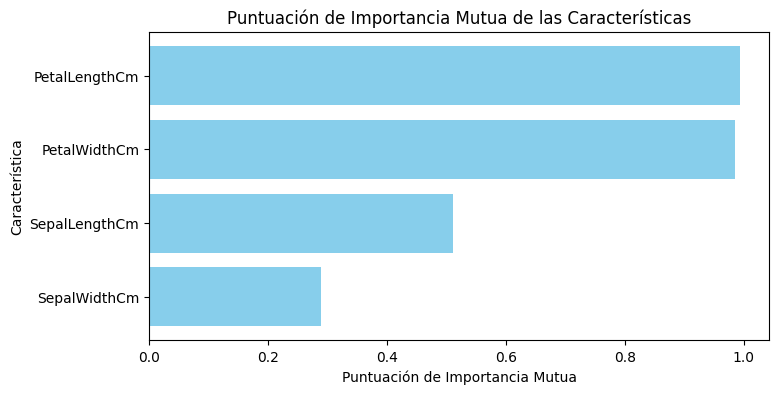

In [17]:
# Calcula la importancia mutua de las características con respecto a la variable objetivo
feature_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
feature_scores

# Crea un DataFrame para visualizar las puntuaciones de importancia mutua por característica
feature_scores_df_mutua = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': feature_scores})
feature_scores_df_mutua = feature_scores_df_mutua.sort_values(by='Mutual_Info_Score', ascending=False)

# Visualiza las puntuaciones de importancia mutua
display(feature_scores_df_mutua)

# Gráfica de barras de las puntuaciones de importancia mutua
plt.figure(figsize=(8, 4))
plt.barh(feature_scores_df_mutua['Feature'], feature_scores_df_mutua['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Puntuación de Importancia Mutua')
plt.ylabel('Característica')
plt.title('Puntuación de Importancia Mutua de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()


En la salida anterior se ve que la longitud del pelalo y el ancho del petalo tiene un mayor valor de información mutua lo que significa que tienen una relación muy fuerte con la variable objetivo, en otras palabras deben ser mas inportantes para distingir las especies por un clasificador.

Veamos un pair plot

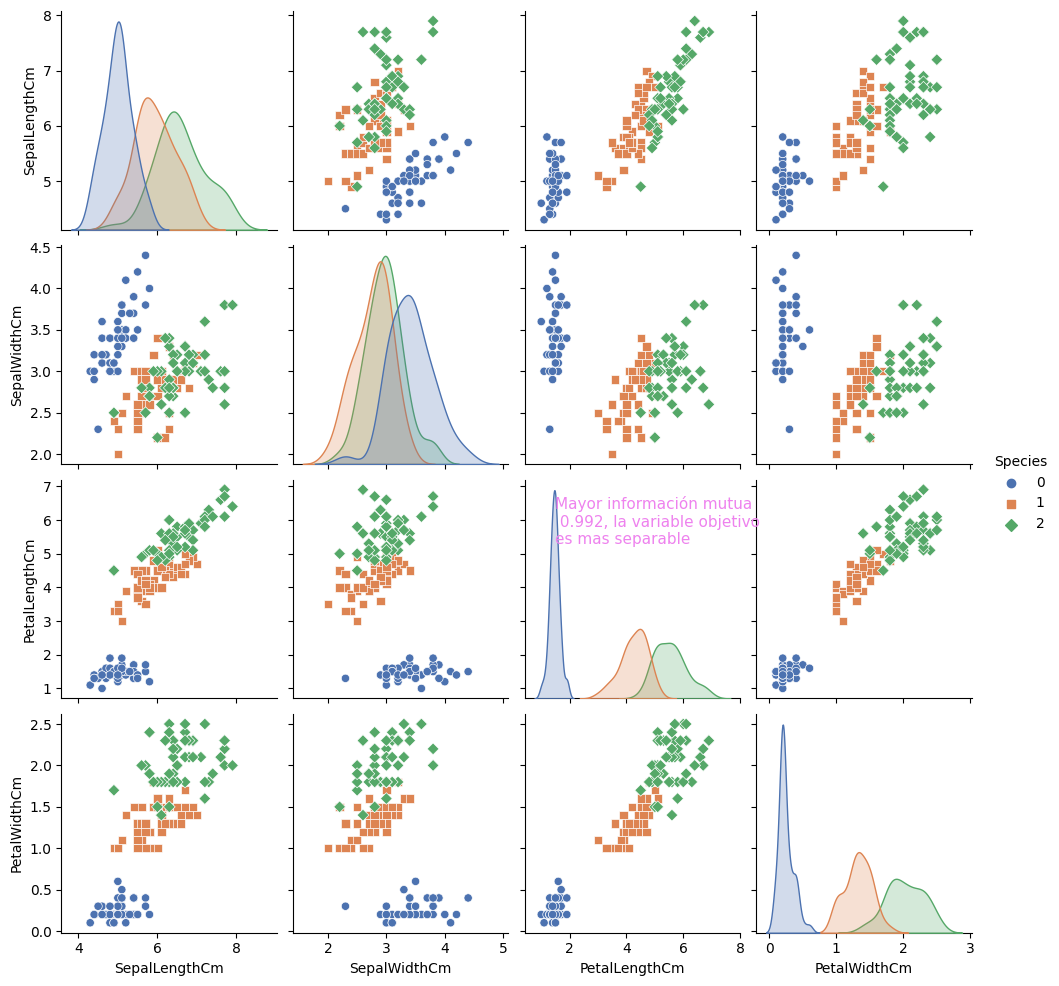

In [18]:
sns.pairplot(df_iris.drop(columns=['Id']), hue="Species", markers=["o", "s", "D"],palette="deep")

plt.text(-3.2, 3, "Mayor información mutua\n 0.992, la variable objetivo\nes mas separable", fontsize=11, color='violet')
plt.show()

### Chi-square Test

La pruba chi2 determina si dos variables categoricas estan relacionadas entre side alguna manera


In [19]:
import warnings

# Configurar el filtro de advertencias
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Feature', 'dof','chi2','p-value', 'Significativo'])

# Variable objetivo
target_variable = 'Species'

# Iterar a través de todas las características
for feature in df_iris.drop(columns=['Id']).columns:
    if feature != target_variable:  # Evitar comparar la variable objetivo con sí misma
        observed = pd.crosstab(df_iris[feature], df_iris[target_variable])
        #
        chi2, p, dof, expected = chi2_contingency(observed)
        is_significant = p < 0.05

        # Agregar los resultados al DataFrame
        results_df = results_df.append({'Feature': feature,'dof':dof,'chi2':chi2 ,'p-value': p, 'Significativo': is_significant}, ignore_index=True)

# Visualizar la tabla de resultados
display(results_df)

,Feature,dof,chi2,p-value,Significativo
0,SepalLengthCm,68,156.266667,6.665987e-09,True
1,SepalWidthCm,44,88.364469,8.303948e-05,True
2,PetalLengthCm,84,271.800000,1.177567e-21,True
3,PetalWidthCm,42,271.750000,2.164810e-35,True


Teniedo los valores de la prueba sobre cada caracteristica, podemos ver el valor critico para cada una y ver porque todas son verdaderas.

In [20]:
from scipy.stats import chi2

# Nivel de significancia
alpha = 0.05


n = 150

# Grados de libertad = (filas-1)(columnas-1)
grados_libertad = results_df.dof.values
valor_critico=[]

for feat,grados in zip(results_df['Feature'],grados_libertad):
    # Calcular el valor crítico de la distribución chi-cuadrado
    valor_critico.append(chi2.ppf(1 - alpha, df=grados))
   

results_df["valor critico"] = valor_critico
results_df

,Feature,dof,chi2,p-value,Significativo,valor critico
0,SepalLengthCm,68,156.266667,6.665987e-09,True,88.250164
1,SepalWidthCm,44,88.364469,8.303948e-05,True,60.480887
2,PetalLengthCm,84,271.800000,1.177567e-21,True,106.394840
3,PetalWidthCm,42,271.750000,2.164810e-35,True,58.124038


Vemos que todos los valores de chi son mayores a su valor critico. Por eso todos son true es decir significativo del 0.05, ahora grafiquemos

,Feature,Chi-squared Score,Selected
2,PetalLengthCm,116.169847,True
3,PetalWidthCm,67.244828,True
0,SepalLengthCm,10.817821,True
1,SepalWidthCm,3.594499,True


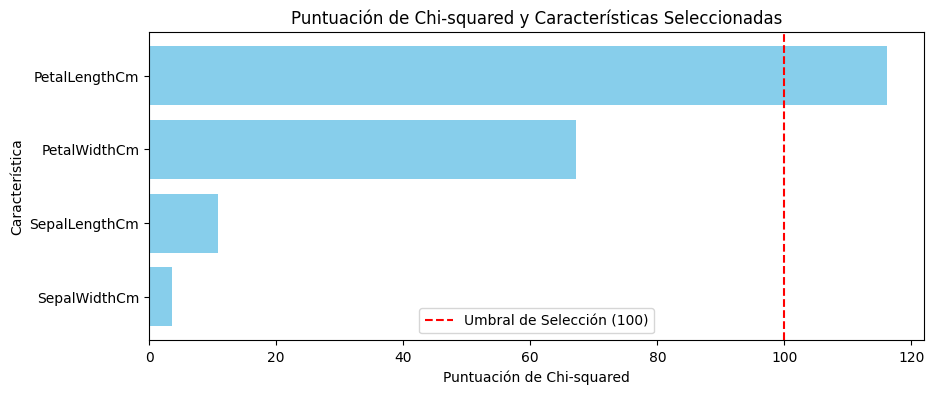

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Crear un objeto SelectKBest con chi2 como métrica
# Especifique el número de características que desea seleccionar con el parámetro 'k'
selector = SelectKBest(score_func=chi2, k='all')


X_new = selector.fit_transform(X, y)


scores = selector.scores_
selected_features = selector.get_support()

# Crear un DataFrame para visualizar las puntuaciones y las características seleccionadas
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi-squared Score': scores, 'Selected': selected_features})

# Ordenar por puntuación de chi-cuadrado en orden descendente
feature_scores_df = feature_scores_df.sort_values(by='Chi-squared Score', ascending=False)

# Visualizar la tabla de resultados
display(feature_scores_df)

import matplotlib.pyplot as plt
import numpy as np

# Crear una figura y ejes
plt.figure(figsize=(10, 4))
ax = plt.gca()

# Barra para todas las características con colores diferentes para destacar las seleccionadas
bar_colors = ['skyblue' if selected else 'lightgray' for selected in feature_scores_df['Selected']]
plt.barh(feature_scores_df['Feature'], feature_scores_df['Chi-squared Score'], color=bar_colors)
plt.xlabel('Puntuación de Chi-squared')
plt.ylabel('Característica')
plt.title('Puntuación de Chi-squared y Características Seleccionadas')

# Dibujar una línea vertical en el umbral de selección (puedes ajustar este valor)
threshold = 100  #Valor de ejemplo
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Umbral de Selección ({threshold})')

# Mostrar la leyenda
plt.legend()

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()



### Fisher's Score
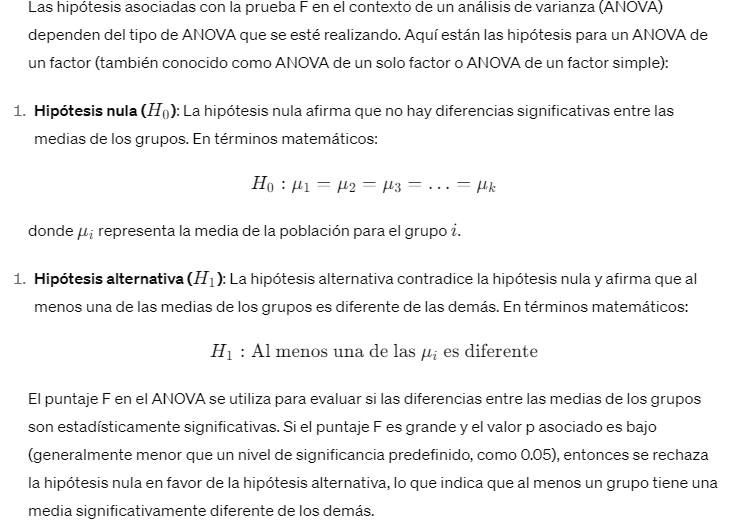
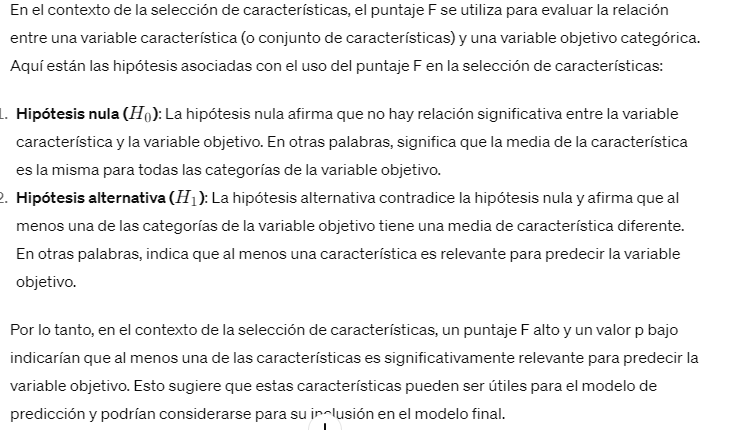
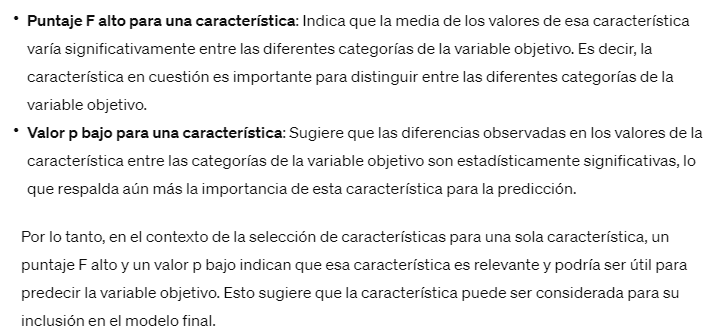


,Feature,Fisher_Score,P-Value
2,PetalLengthCm,1179.034328,3.051976e-91
3,PetalWidthCm,959.324406,4.376957e-85
0,SepalLengthCm,119.264502,1.669669e-31
1,SepalWidthCm,47.364461,1.327917e-16


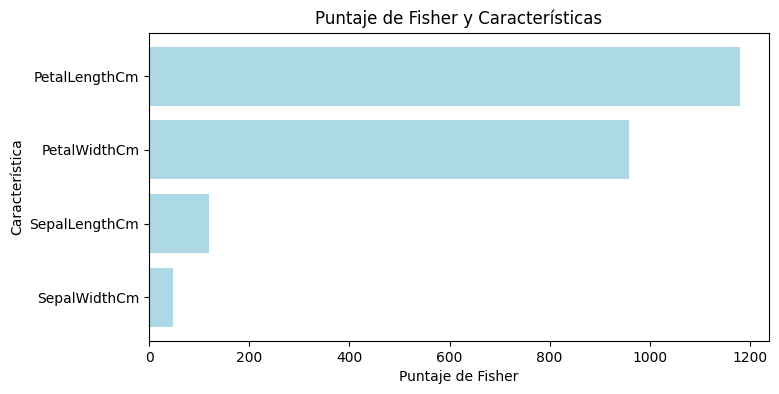

In [22]:
from sklearn.feature_selection import f_classif

# Calcular el puntaje de Fisher
f_scores, p_values = f_classif(X, y)

# Crear un DataFrame para visualizar los puntajes de Fisher
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores, 'P-Value': p_values})

# Ordenar por puntaje de Fisher en orden descendente
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Visualizar la tabla de resultados
display(fisher_scores_df)

# Crear una figura y ejes para graficar los puntajes de Fisher
plt.figure(figsize=(8, 4))
ax = plt.gca()

# Barra para todas las características
plt.barh(fisher_scores_df['Feature'], fisher_scores_df['Fisher_Score'], color='lightblue')
plt.xlabel('Puntaje de Fisher')
plt.ylabel('Característica')
plt.title('Puntaje de Fisher y Características')

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()


### VarianceThreshold
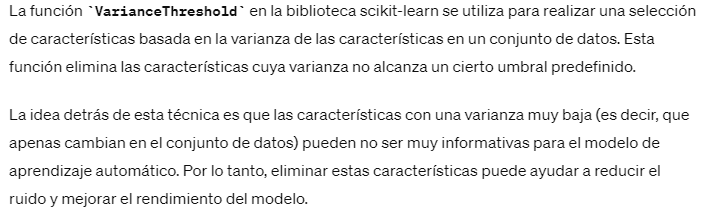
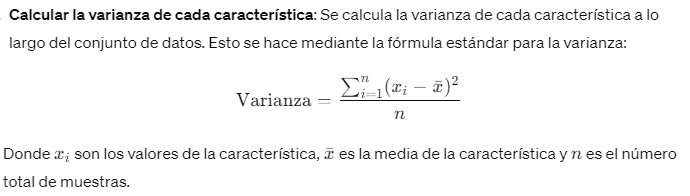

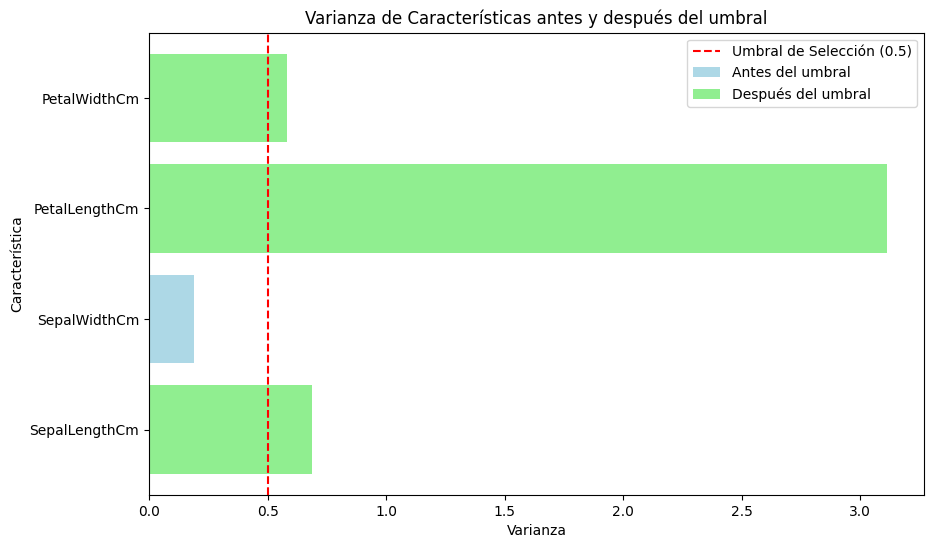

Características seleccionadas:
Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
Dimensiones del DataFrame con características de alta varianza: (150, 3)


In [23]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Calcular la varianza de cada característica antes de aplicar el umbral
variances_before = X.var()

# Crear un objeto VarianceThreshold con un umbral específico (ajusta el valor según tus necesidades)
threshold = 0.5  # Ejemplo de umbral, puedes ajustarlo
variance_selector = VarianceThreshold(threshold)

# Ajustar el selector a tus datos
X_high_variance = variance_selector.fit_transform(X)

# Obtener las características seleccionadas
selected_features = X.columns[variance_selector.get_support()]

# Calcular la varianza de cada característica después de aplicar el umbral
variances_after = X[selected_features].var()

# Crear un gráfico para comparar la varianza antes y después de aplicar el umbral
plt.figure(figsize=(10, 6))
plt.barh(X.columns, variances_before, color='lightblue', label='Antes del umbral')
plt.barh(selected_features, variances_after, color='lightgreen', label='Después del umbral')
plt.xlabel('Varianza')
plt.ylabel('Característica')
plt.title('Varianza de Características antes y después del umbral')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Umbral de Selección ({threshold})')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir las características seleccionadas
print('Características seleccionadas:')
print(selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
diabetes_high_variance = df_iris[selected_features]

# Verificar las dimensiones del nuevo DataFrame
print('Dimensiones del DataFrame con características de alta varianza:', diabetes_high_variance.shape)


### MAD
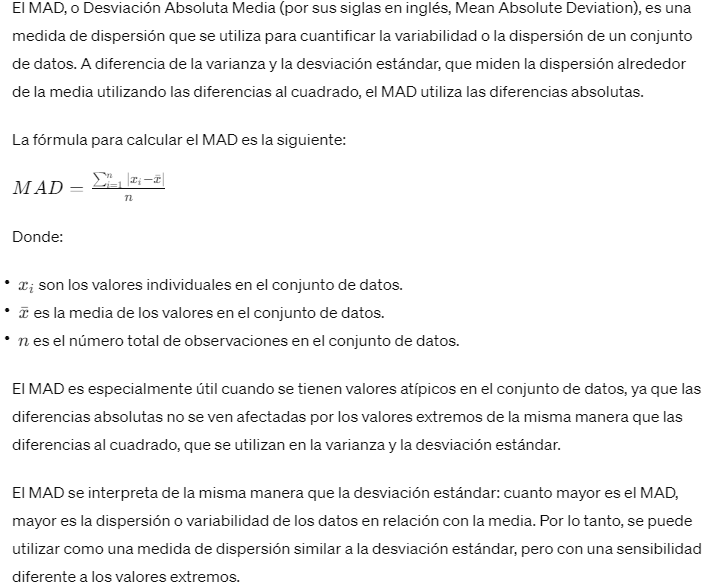

,Feature,MAD_Score
PetalLengthCm,PetalLengthCm,1.561920
SepalLengthCm,SepalLengthCm,0.687556
PetalWidthCm,PetalWidthCm,0.658933
SepalWidthCm,SepalWidthCm,0.333093


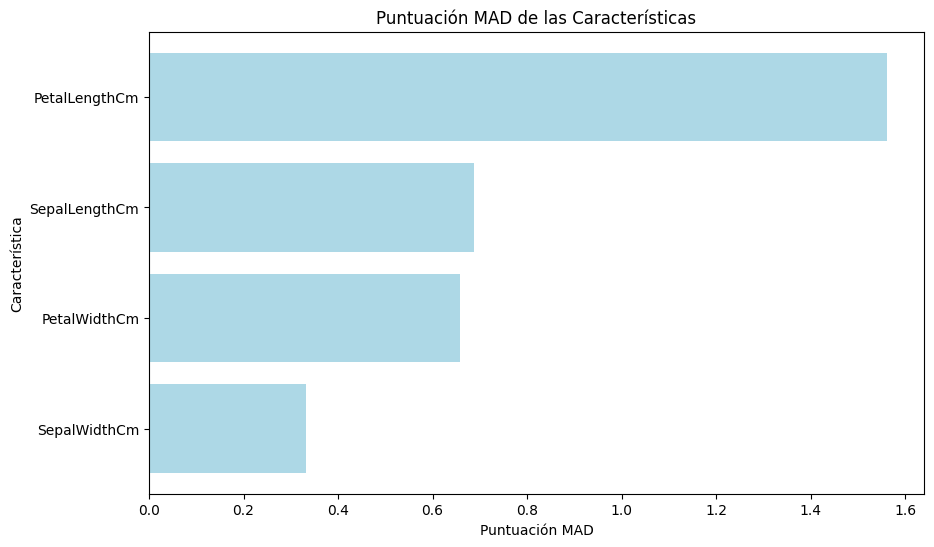

In [69]:
import numpy as np

# Calcular la Mean Absolute Difference (MAD) para cada característica
mean_absolute_differences = np.mean(np.abs(X - np.mean(X, axis=0)), axis=0)

# Crear un DataFrame para visualizar las puntuaciones MAD por característica
mad_scores_df = pd.DataFrame({'Feature': X.columns, 'MAD_Score': mean_absolute_differences})

# Ordenar por puntuación MAD en orden descendente
mad_scores_df = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

# Visualizar la tabla de puntuaciones MAD
display(mad_scores_df)

# Gráfica de barras de las puntuaciones MAD
plt.figure(figsize=(10, 6))
plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')
plt.xlabel('Puntuación MAD')
plt.ylabel('Característica')
plt.title('Puntuación MAD de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

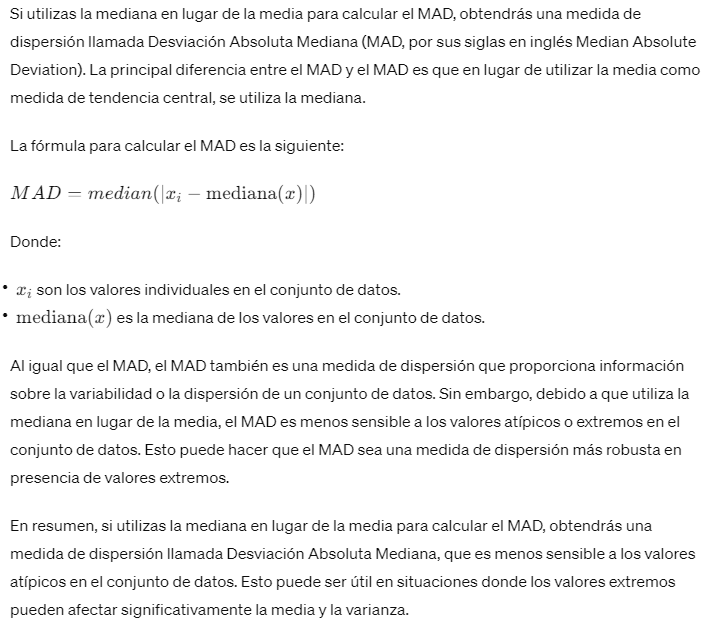

Hagamos el calculo con la mediana 

,Feature,MAD_Score
2,PetalLengthCm,1.25
0,SepalLengthCm,0.70
3,PetalWidthCm,0.70
1,SepalWidthCm,0.25


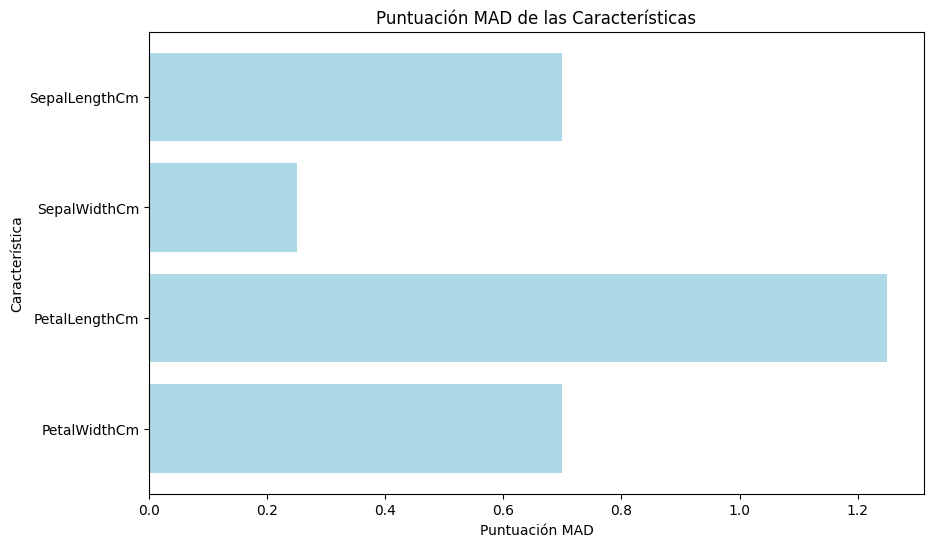

In [68]:
import numpy as np

# Calcular la Mean Absolute Difference (MAD) para cada característica
mean_absolute_differences = np.median(np.abs(X - np.median(X, axis=0)), axis=0)

# Crear un DataFrame para visualizar las puntuaciones MAD por característica
mad_scores_df = pd.DataFrame({'Feature': X.columns, 'MAD_Score': mean_absolute_differences})

# Ordenar por puntuación MAD en orden descendente
mad_scores_df_ = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

# Visualizar la tabla de puntuaciones MAD
display(mad_scores_df_)

# Gráfica de barras de las puntuaciones MAD
plt.figure(figsize=(10, 6))
plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')
plt.xlabel('Puntuación MAD')
plt.ylabel('Característica')
plt.title('Puntuación MAD de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

## Respuestas a las preguntas:

1. ¿Al realizar la aplicación de los métodos, se encuentra repetibilidad en las características ponderadas?, en cualquier caso, justifique su respuesta.
Para esto unamos los dataframe con los filtros aplicados

In [73]:
from functools import reduce

variance = X.var()
variance_df = pd.DataFrame({'Feature': variance.index, 'Varianza': variance.values})
# Lista de DataFrames
dfs = [feature_scores_df_mutua, results_df.drop(columns='dof'),
       feature_scores_df.drop(columns='Selected'),fisher_scores_df,mad_scores_df]

dt_filtrados =  reduce(lambda left, right: pd.merge(left, right, on='Feature', how='outer'), dfs)
dt_filtrados

,Feature,Mutual_Info_Score,chi2,p-value,Significativo,valor critico,Chi-squared Score,Fisher_Score,P-Value,MAD_Score
0,PetalLengthCm,0.992573,271.800000,1.177567e-21,True,106.394840,116.169847,1179.034328,3.051976e-91,1.561920
1,PetalWidthCm,0.985643,271.750000,2.164810e-35,True,58.124038,67.244828,959.324406,4.376957e-85,0.658933
2,SepalLengthCm,0.511365,156.266667,6.665987e-09,True,88.250164,10.817821,119.264502,1.669669e-31,0.687556
3,SepalWidthCm,0.289759,88.364469,8.303948e-05,True,60.480887,3.594499,47.364461,1.327917e-16,0.333093


Podemos ver la repetibilidad de las caracteristicas en los diferentes score en general, por lo menos, para la caracteristica PetalLengthCm, todos los score son maximos. 

2. En función de los resultados obtenidos en el ítem 1, ¿Considera que tienen los resultados coherencia con el análisis que previamente habría realizado en el EDA?
Si son coherentes si vemos la grafica de pairplot muestra que las caracteristicas mas separables son PetalLengthCm	y PetalWidthCm, lo que en general esta de acuerdo a casi todos los score de caracteristicas, ademas, vemos 
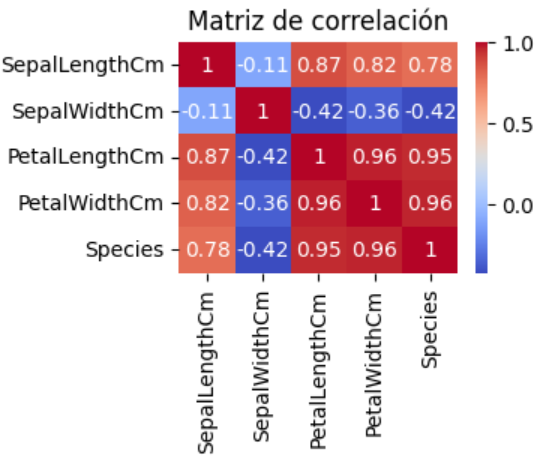
que en la matriz de correlacion las caracteisticas con correlacion mas fuerte a la variable objetivo(Specie), son PetalLengthCm	y PetalWidthCm nuevamente.



3. Si tuviera que decidir ante la siguiente afirmación: "Se requiere escoger solo 2 características del conjunto de datos IRIS DATASET de las 4 presentes" ¿Cuáles escogería?, Justifique su respuesta.
Se escojeria PetalLengthCm y SepalLengthCm, que tienen altos valores de score y ademas no presentan una correlacion tan alta entre ellas como PetalLengthCm y PetalWidthCm, por tanto, PetalLengthCm y SepalLengthCm proveen información adicional a un modelo de clasificación, no tan redundante como PetalLengthCm y PetalWidthCm debido a su alta correlación.
